<a href="https://colab.research.google.com/drive/1uj_QK86X7qSGtq11ztLkY2yg9GO8GYRx?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)

# GYM

[Gym](https://gym.openai.com) is a toolkit for developing and comparing reinforcement learning algorithms. It supports teaching agents everything from walking to playing games like Pong or Pinball. Open source interface to reinforcement learning tasks. The gym library provides an easy-to-use suite of reinforcement learning tasks.

![RL](https://gym.openai.com/assets/docs/aeloop-138c89d44114492fd02822303e6b4b07213010bb14ca5856d2d49d6b62d88e53.svg)

- [documentation](https://gym.openai.com/docs/)
- [GitHub](https://github.com/openai/gym)

Gym makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Theano.

## Available Environments
Gym comes with a diverse suite of environments that range from easy to difficult and involve many different kinds of data. View the full list of environments to get the birds-eye view.

- **Classic control and toy text**: complete small-scale tasks, mostly from the RL literature. They’re here to get you started.
- **Algorithmic**: perform computations such as adding multi-digit numbers and reversing sequences. One might object that these tasks are easy for a computer. The challenge is to learn these algorithms purely from examples. These tasks have the nice property that it’s easy to vary the difficulty by varying the sequence length.
- **Atari**: play classic Atari games. We’ve integrated the Arcade Learning Environment (which has had a big impact on reinforcement learning research) in an easy-to-install form.
- **2D and 3D robots**: control a robot in simulation. These tasks use the MuJoCo physics engine, which was designed for fast and accurate robot simulation. Included are some environments from a recent benchmark by UC Berkeley researchers (who incidentally will be joining us this summer). MuJoCo is proprietary software, but offers free trial licenses.

In [0]:
!pip install pyvirtualdisplay 
!apt-get install -y xvfb python-opengl ffmpeg
!pip install gym
!pip install box2d-py
#!pip install pyglet==1.3.2
!pip install pyglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,682 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 1,280 kB in 1s (1,307 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Selecting previously unselected package xvfb.
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4

In [0]:
%tensorflow_version 2.x
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

In [0]:
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

*env.step(action)* returns four values:

- **observation** (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.
- **reward** (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
- **done** (boolean): whether it’s time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
- **info** (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). However, official evaluations of your agent are not allowed to use this for learning.

In [0]:
env = wrap_env(gym.make("CartPole-v0"))
print('observation space:', env.observation_space)
print('action space:', env.action_space)

state = env.reset()
for t in range(1000):
    action = env.action_space.sample() # your agent here (this takes random actions)
    env.render()
    observation, reward, done, info = env.step(action)
    if done: 
      break;
            
print('steps: ', t)
env.close()
show_video()

observation space: Box(4,)
action space: Discrete(2)
steps:  24


In [0]:
env = wrap_env(gym.make("Assault-v0"))
print('observation space:', env.observation_space)
print('action space:', env.action_space)

rewards_list = []
state = env.reset()
for t in range(1000):
    action = env.action_space.sample() # your agent here (this takes random actions)
    env.render()
    observation, reward, done, info = env.step(action)
    rewards_list.append(reward)
    if done: 
      break;
            
print('steps: ', t)
env.close()
show_video()

observation space: Box(250, 160, 3)
action space: Discrete(7)
steps:  742


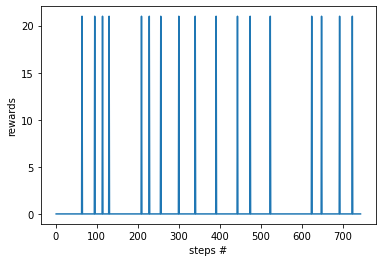

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(rewards_list)+1), rewards_list)
plt.ylabel('rewards')
plt.xlabel('steps #')
plt.show()

In [0]:
env = wrap_env(gym.make("Breakout-v0"))
print('observation space:', env.observation_space)
print('action space:', env.action_space)

rewards_list = []
state = env.reset()
for t in range(1000):
    action = env.action_space.sample() # your agent here (this takes random actions)
    env.render()
    observation, reward, done, info = env.step(action)
    rewards_list.append(reward)
    if done: 
      break;
            
print('steps: ', t)
env.close()
show_video()

observation space: Box(210, 160, 3)
action space: Discrete(4)
steps:  226


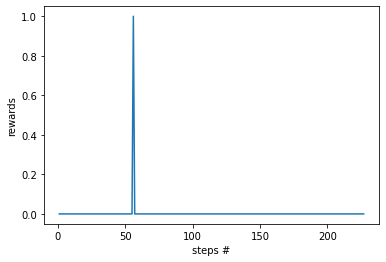

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(rewards_list)+1), rewards_list)
plt.ylabel('rewards')
plt.xlabel('steps #')
plt.show()

In [0]:
env = wrap_env(gym.make("BipedalWalker-v3"))
print('observation space:', env.observation_space)
print('action space:', env.action_space)

rewards_list = []
state = env.reset()
for t in range(1000):
    action = env.action_space.sample() # your agent here (this takes random actions)
    env.render()
    observation, reward, done, info = env.step(action)
    rewards_list.append(reward)
    if done: 
      break;
            
print('steps: ', t)
env.close()
show_video()

observation space: Box(24,)
action space: Box(4,)
steps:  999


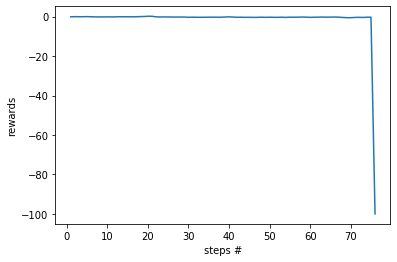

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(rewards_list)+1), rewards_list)
plt.ylabel('rewards')
plt.xlabel('steps #')
plt.show()

In [0]:
env = wrap_env(gym.make("LunarLander-v2"))
print('observation space:', env.observation_space)
print('action space:', env.action_space)

rewards_list = []
state = env.reset()
for t in range(1000):
    action = env.action_space.sample() # your agent here (this takes random actions)
    env.render()
    observation, reward, done, info = env.step(action)
    rewards_list.append(reward)
    if done: 
      break;
            
print('steps: ', t)
env.close()
show_video()

observation space: Box(8,)
action space: Discrete(4)
steps:  114


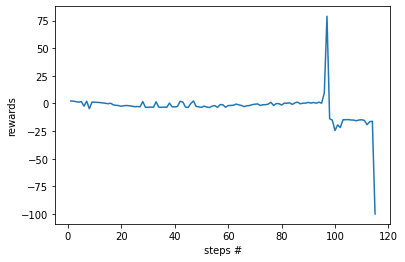

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(rewards_list)+1), rewards_list)
plt.ylabel('rewards')
plt.xlabel('steps #')
plt.show()